In [1]:
import sys
sys.path.append('../')

import numpy as np
import helper
from scipy.optimize import LinearConstraint, NonlinearConstraint


trust-constr with linear constaints
Levels: [0.         0.05295632 0.14560727 0.1456083  0.14561342 0.14563911
 0.14576952 0.14652825 0.14652839 0.14764152 0.1516063  0.15164575
 0.15845875 0.17230976 0.17249704 0.20563723 0.20644406 0.25485757
 0.2551565  0.25577726 0.32971154 1.06313064 1.88350596]
trust-constr    ==>   0.145607 in [  0.618795,   0.381204] in 31 steps.


/Users/mac/JetBrains_Projects/PycharmProjects/MetOpt/Sources/AT1/../helper/package_AT1/module_compare_and_output.py:27: UserWarning: linewidths is ignored by contourf
  cf = ax.contourf(file_info_3d.X, file_info_3d.Y, file_info_3d.Z, levels=levels, antialiased=True, linewidths=1.7,


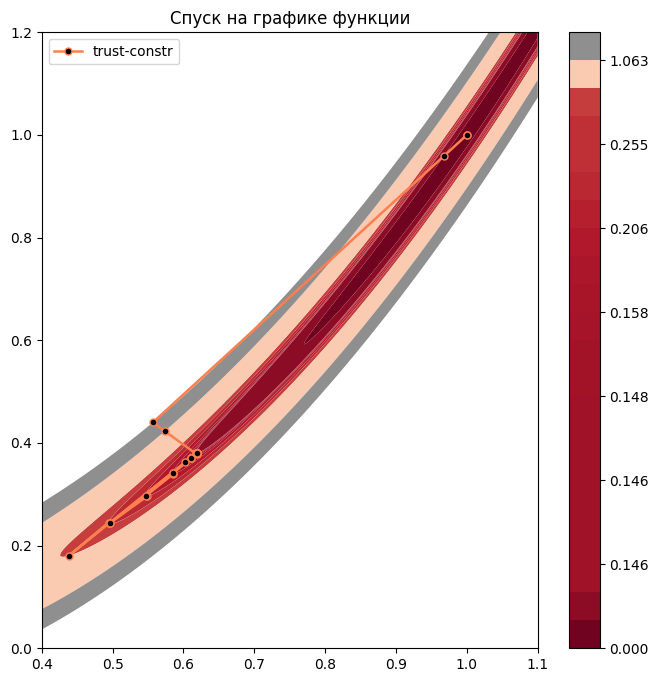

trust-constr with non-linear constaints
Levels: [0.         0.04567506 0.04567609 0.04568122 0.0457071  0.04584559
 0.04584727 0.04667906 0.04670321 0.05008717 0.05327056 0.05349962
 0.06978385 0.07745429 0.08390322 0.46400144 0.73540422 1.66440136
 2.01957545]
trust-constr    ==>   0.045675 in [  0.786415,   0.617697] in 27 steps.


/Users/mac/JetBrains_Projects/PycharmProjects/MetOpt/Sources/AT1/../helper/package_AT1/module_compare_and_output.py:27: UserWarning: linewidths is ignored by contourf
  cf = ax.contourf(file_info_3d.X, file_info_3d.Y, file_info_3d.Z, levels=levels, antialiased=True, linewidths=1.7,


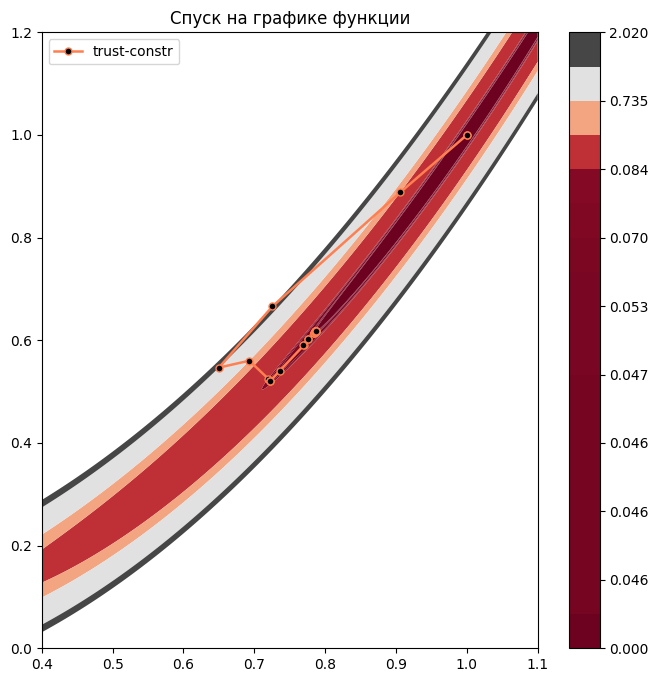

In [2]:
def fun(x):
    return x[0] ** 2 + x[1] ** 2

def rosen(x):
    return (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2

# Задаем линейные ограничения
A = np.array([[1, 1]])
b = np.array([1])
x0 = (1, 1)
x_lin = np.linspace(0.4, 1.1, 400, dtype=float)
y_lin = np.linspace(0, 1.2, 400, dtype=float)

# Задаем границы переменных
bounds = ((-1, 1), (-1, 1))

# Без ограничений
options = {'maxiter' : 10, 'gtol' : 1e-9, 'return_all' : True}
helper.minimize_and_output(rosen, x0, x_lin, y_lin, 'BFGS', 'BFGS', 'BFGS without constaints', options=options)

# С линейными ограничениями
linear_constraints = [LinearConstraint(A, -np.inf, b)]
# res_linear = minimize(fun, (1, 1), method='trust-constr', constraints=[linear_constraint], bounds=bounds)
helper.minimize_and_output(
    rosen, x0, x_lin, y_lin, 
    'trust-constr', 'trust-constr', 'trust-constr with linear constaints', 
    constraints=linear_constraints, bounds=bounds, manual_history=True
)

# С нелинейными ограничениями
nonlinear_constraints = [NonlinearConstraint(lambda x: x[0]**2 + x[1]**2 - 1, -np.inf, 0)]
# res_nonlinear = minimize(fun, (1, 1), method='trust-constr', constraints=[nonlinear_constraint], bounds=bounds)
helper.minimize_and_output(
    rosen, x0, x_lin, y_lin, 
    'trust-constr', 'trust-constr', 'trust-constr with non-linear constaints', 
    constraints=nonlinear_constraints, bounds=bounds, manual_history=True
)
